In [8]:
from helpers import load_data #Selfmade file for loading data in correct format
# import time
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import dates
# import seaborn
# import torch
# import pyreadr
# import requests
# import urllib.request
# import math
import pandas as pd 
# import random
import numpy as np
# from sklearn.datasets import load_iris 
# from scipy.ndimage import gaussian_filter
# from sklearn import preprocessing
# from sklearn import utils
import seaborn as sns
from sklearn.impute import KNNImputer

    
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import svm
# from torchvision import datasets, transforms
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [ ]:
#Load modified plant 2 datasets
P2=pd.read_csv('archive/Plant2_summed_dataset.csv',na_values= '?')
# display(P2)

P2 = P2[['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
display(P2)


In [3]:
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# # feature_names=['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
# X = P2[feature_names]
# y = P2['AC_POWER']


from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/34, shuffle=False)


# # See that the data is split properly in time. Can add "DATE_TIME" t ofeatures, to verify.
# display(X_train)
# display(X_test)


#OUTLIER DETECTION
P2_det=P2.copy()
anomaly_inputs=['AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
#IN IsolationForest, adjust contamination [0-0,5], indicates the percentage of expected outliers.
#Use plot at the end of this code block to check if the outliers are actually identified
model_IF = IsolationForest(contamination=0.03, random_state=42)
model_IF.fit(P2_det[anomaly_inputs])
P2_det['anomaly_scores'] = model_IF.decision_function(P2_det[anomaly_inputs])
P2_det['anomaly'] = model_IF.predict(P2_det[anomaly_inputs])


#OUTLIER INDEXES
out_index=np.asarray(np.where(P2_det['anomaly']==-1)[0]).astype(int)
#INLIER INDEXES
in_index=np.asarray(np.where(P2_det['anomaly']==1)[0]).astype(int)

#MAKING COPY TO MAKE CHANGES TO
P2_imp=pd.DataFrame(P2.copy())

#REPLACING OUTLIERS WITH NaN
P2_imp.iloc[out_index,1]=np.nan
P2_imp['DATE_TIME']=pd.to_datetime(P2_imp['DATE_TIME'])

#SANITY CHECKS
display(P2_imp)# SHOW DATAFRAME


#KNN IMPUTATION
imputer = KNNImputer(n_neighbors=3)
P2_imp.iloc[:,1:]=imputer.fit_transform(P2_imp.iloc[:,1:])


#print('missing values:',P2_imp.isna().sum())


plt.figure(figsize=(14,5))
start, end= 0,(len(P2)-1)
plt.plot(pd.to_datetime(P2_det.iloc[:,0]),P2_det.iloc[:,1],color='green')#ORIGINAL DATA
plt.plot(pd.to_datetime(P2_det.iloc[in_index,0]),P2_det.iloc[in_index,1],color='red')#INLIERS
plt.plot(pd.to_datetime(P2_det.iloc[:,0]),P2_imp.iloc[:,1],color='purple')#IMPUTED DATA
plt.scatter(pd.to_datetime(P2_det.iloc[out_index,0]),P2_det.iloc[out_index,1],color='blue')#OUTLIERS
plt.xlim([pd.to_datetime(P2_det.iloc[start,0]),pd.to_datetime(P2_det.iloc[end,0])])
plt.legend(['Original data','Inliers','Imputed data','Outliers'])
plt.show()

#USE THIS DATA INSTEAD IN THE REST OF THE CODE

feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
X_imp = P2_imp[feature_names]
y_imp = P2_imp['AC_POWER']
# scaler1=MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaler1.fit(X_imp)
X_imp=pd.DataFrame(scaler.transform(X_imp))
# X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=6/34, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X_imp, y_imp, test_size=6/34, shuffle=False)
#display(P2_imp)

display(X_train)


# #Making scaler
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# #Fitting scaler to the data
# scaler.fit(X_test)

# #Transform the data to normal distributions
# X_test=pd.DataFrame(scaler.transform(X_test))
# X_train=pd.DataFrame(scaler.transform(X_train))

# display(X_test)



NameError: name 'IsolationForest' is not defined

In [32]:
# NOT ISED!!! Jut example of TimeSeriesSplit

# # import xgboost as xgb
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# # X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
# # y = np.array([1, 6, 7, 1, 2, 3])

# # model = xgb.XGBRegressor()
# param_search = {'max_depth' : [3, 5]}

# tscv = TimeSeriesSplit(n_splits=2)
# gsearch = GridSearchCV(estimator=model, cv=tscv,
#                         param_grid=param_search)
# gsearch.fit(X, y)

In [44]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_impurity_decrease=0.0, max_depth=None,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")


# from sklearn.tree import plot_tree
# plt.figure(figsize=(10, 3), dpi=300)
# tree_dot = plot_tree(dtr, feature_names=feature_names) # Takes >2min to plot


from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
tscv = TimeSeriesSplit(n_splits=7)
dtr2 = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


Score is 79.1488 %
{'max_depth': 2, 'min_impurity_decrease': 0}
0.872074924516304


In [34]:
results = pd.DataFrame(grid.cv_results_)
display(results)

display(results[['params','mean_test_score','mean_train_score']])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.003248,0.001251,0.001783,0.000365,2,0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
1,0.003611,0.000607,0.002078,0.000629,2,1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
2,0.004928,0.001236,0.002650,0.000518,2,2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
3,0.004597,0.000743,0.002149,0.000242,2,3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
4,0.003888,0.001076,0.002007,0.000607,2,4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.006149,0.002315,0.002358,0.000353,9,10,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.625718,0.805591,0.912747,...,106,0.999257,0.983457,0.968459,0.967409,0.966219,0.960165,0.944190,0.969879,0.016139
116,0.006227,0.001883,0.002933,0.000735,9,11,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.625698,0.805591,0.912747,...,108,0.999256,0.983457,0.968459,0.967409,0.966219,0.960164,0.944189,0.969879,0.016139
117,0.007649,0.002587,0.002506,0.000762,9,12,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.625698,0.805591,0.912749,...,109,0.999256,0.983457,0.968459,0.967408,0.966218,0.960164,0.944188,0.969878,0.016139
118,0.007395,0.002860,0.003075,0.000680,9,13,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.625698,0.808342,0.912749,...,110,0.999256,0.983456,0.968458,0.967408,0.966218,0.960163,0.944187,0.969878,0.016139


,params,mean_test_score,mean_train_score
0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.859536,0.905553
1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.859536,0.905553
2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.859536,0.905553
3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.859536,0.905553
4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.859536,0.905553
...,...,...,...
115,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.815882,0.969879
116,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.814251,0.969879
117,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.813705,0.969878
118,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.813702,0.969878


Score is 88.2935 %
{'n_estimators': 32}
0.8856226038900051
0     0.846236
1     0.859098
2     0.860903
3     0.862022
4     0.862402
5     0.862910
6     0.862571
7     0.862671
8     0.863399
9     0.864044
10    0.864562
11    0.864069
12    0.864378
13    0.864131
14    0.864083
15    0.864189
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.007937,0.001415,0.002797,0.000689,2,{'n_estimators': 2},0.687064,0.862365,0.904552,0.864164,...,16,0.966404,0.884677,0.894470,0.903145,0.897962,0.898537,0.895386,0.905797,0.025290
1,0.016467,0.002393,0.003354,0.000441,5,{'n_estimators': 5},0.667524,0.910788,0.924062,0.870765,...,15,0.980603,0.894064,0.902936,0.911175,0.905933,0.903697,0.903543,0.914565,0.027366
2,0.024927,0.002779,0.004372,0.001024,8,{'n_estimators': 8},0.657732,0.909438,0.930328,0.874808,...,14,0.981898,0.897137,0.907191,0.914640,0.908377,0.905460,0.906004,0.917244,0.026822
3,0.033355,0.009323,0.004398,0.001282,11,{'n_estimators': 11},0.656969,0.913960,0.931452,0.875599,...,13,0.982989,0.899080,0.908759,0.914727,0.908368,0.905697,0.906477,0.918014,0.026872
4,0.045900,0.017227,0.005078,0.000932,14,{'n_estimators': 14},0.652709,0.917431,0.932692,0.876586,...,12,0.984081,0.898353,0.908946,0.915272,0.908613,0.906058,0.906927,0.918322,0.027242
5,0.062438,0.019842,0.013335,0.015939,17,{'n_estimators': 17},0.655845,0.917544,0.932489,0.876056,...,9,0.984089,0.898951,0.909259,0.915187,0.908720,0.906157,0.906796,0.918451,0.027165
6,0.072304,0.029575,0.006745,0.000880,20,{'n_estimators': 20},0.658374,0.913575,0.932033,0.875974,...,11,0.983473,0.899353,0.909230,0.914726,0.908200,0.905798,0.906197,0.918140,0.027008
7,0.095202,0.029244,0.007119,0.002439,23,{'n_estimators': 23},0.655956,0.913753,0.932270,0.876357,...,10,0.984020,0.899558,0.909627,0.915267,0.908918,0.906109,0.906653,0.918593,0.027062
8,0.086676,0.023046,0.010028,0.006649,26,{'n_estimators': 26},0.653530,0.917054,0.932962,0.877729,...,8,0.984535,0.900162,0.910733,0.915877,0.909542,0.906698,0.907026,0.919225,0.027023
9,0.082064,0.012440,0.007081,0.000726,29,{'n_estimators': 29},0.653103,0.921193,0.933365,0.878461,...,7,0.984578,0.900450,0.910993,0.916150,0.909716,0.907053,0.907170,0.919444,0.026951


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\2676497153.py:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\2676497153.py:38: DeprecationWarning: `np.int` is a deprecat

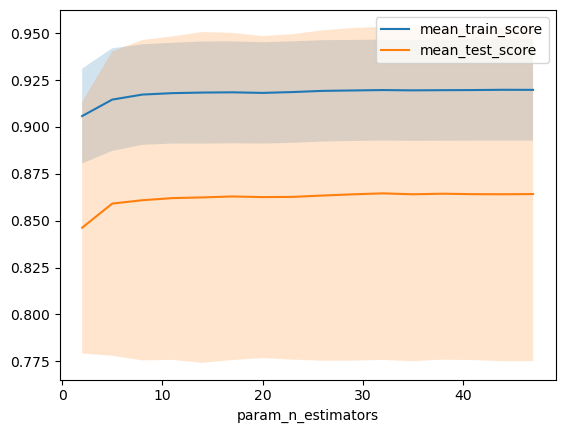

In [35]:

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, min_impurity_decrease=0.0, max_depth=None,  random_state=42, n_jobs=-1)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")




# param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
#     # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
# tscv = TimeSeriesSplit(n_splits=7)
# dtr2 = DecisionTreeRegressor(random_state=42)
# grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.score(X_test, y_test))


param_grid_tree = {'n_estimators': range(2,50,3)}
rfr2 = RandomForestRegressor(min_impurity_decrease=0, max_depth=3, max_features=2, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_depth': 3}
0.8979233000540515
0    0.805960
1    0.867950
2    0.854515
3    0.842766
4    0.840860
5    0.833988
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.015939,0.001679,0.003153,0.000584,1,{'max_depth': 1},0.620318,0.887092,0.885050,0.818425,...,6,0.910561,0.829222,0.850525,0.859447,0.843600,0.837462,0.840421,0.853034,0.025112
1,0.023539,0.006495,0.003936,0.000911,3,{'max_depth': 3},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
2,0.028087,0.007519,0.003865,0.000746,5,{'max_depth': 5},0.622708,0.909967,0.931358,0.876499,...,2,0.992290,0.938054,0.939533,0.937393,0.928769,0.922953,0.918182,0.939596,0.022793
3,0.038011,0.014081,0.005295,0.001588,7,{'max_depth': 7},0.615504,0.899715,0.923772,0.861034,...,3,0.996259,0.962316,0.960306,0.953787,0.944056,0.939535,0.932106,0.955481,0.019519
4,0.031361,0.007805,0.004430,0.000908,9,{'max_depth': 9},0.630296,0.887858,0.923390,0.860376,...,4,0.996769,0.973780,0.973800,0.966201,0.958676,0.955237,0.947436,0.967414,0.014968
5,0.026818,0.005746,0.003379,0.000837,11,{'max_depth': 11},0.613278,0.884338,0.917785,0.854669,...,5,0.996834,0.977203,0.979116,0.978193,0.969682,0.965175,0.960640,0.975263,0.010949


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\997741295.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_depth.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\997741295.py:18: DeprecationWarning: `np.int` is a deprecated al

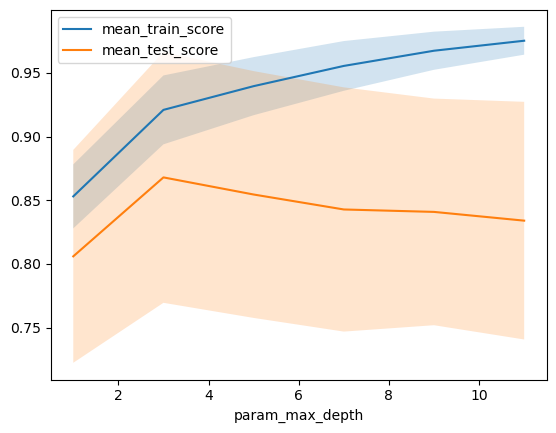

In [37]:
param_grid_tree = {'max_depth': range(1,12,2)}

rfr2 = RandomForestRegressor(n_estimators=6, min_impurity_decrease=0, max_features=3, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_depth', 'mean_train_score')
results.plot('param_max_depth', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'min_impurity_decrease': 0}
0.8856226038900051
0    0.864562
1    0.864562
2    0.864562
3    0.864562
4    0.864562
5    0.864562
6    0.864562
7    0.864562
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.081462,0.013968,0.008875,0.003981,0,{'min_impurity_decrease': 0},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
1,0.099688,0.017959,0.017468,0.014765,5,{'min_impurity_decrease': 5},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
2,0.116478,0.052291,0.008261,0.001521,10,{'min_impurity_decrease': 10},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
3,0.122042,0.033762,0.009682,0.002030,15,{'min_impurity_decrease': 15},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
4,0.108566,0.020388,0.008809,0.001649,20,{'min_impurity_decrease': 20},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
5,0.094372,0.011818,0.008381,0.001078,25,{'min_impurity_decrease': 25},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
6,0.095834,0.027174,0.006301,0.002224,30,{'min_impurity_decrease': 30},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916
7,0.088734,0.010959,0.005871,0.001589,35,{'min_impurity_decrease': 35},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.91015,0.907249,0.907596,0.919661,0.026916


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\218450040.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\218450040.py:18: DeprecationWarning: `np.int` is a d

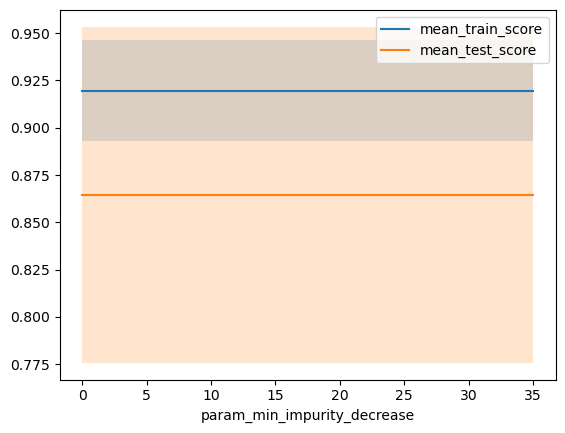

In [38]:
param_grid_tree = {'min_impurity_decrease': range(0,40,5)}

rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, max_features=2, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_min_impurity_decrease', 'mean_train_score')
results.plot('param_min_impurity_decrease', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_features': 2}
0.8856226038900051
0    0.840341
1    0.864562
2    0.863896
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.082525,0.026213,0.009673,0.002940,1,{'max_features': 1},0.698095,0.873019,0.911791,0.845035,...,3,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
1,0.112047,0.036014,0.009438,0.002347,2,{'max_features': 2},0.652932,0.921615,0.933226,0.879468,...,1,0.984667,0.900368,0.911109,0.916484,0.910150,0.907249,0.907596,0.919661,0.026916
2,0.100949,0.015396,0.006485,0.001875,3,{'max_features': 3},0.624940,0.923397,0.932585,0.882583,...,2,0.986751,0.900009,0.912612,0.918451,0.912190,0.908920,0.909304,0.921177,0.027257


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\3324244303.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_features.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_15260\3324244303.py:18: DeprecationWarning: `np.int` is a deprecat

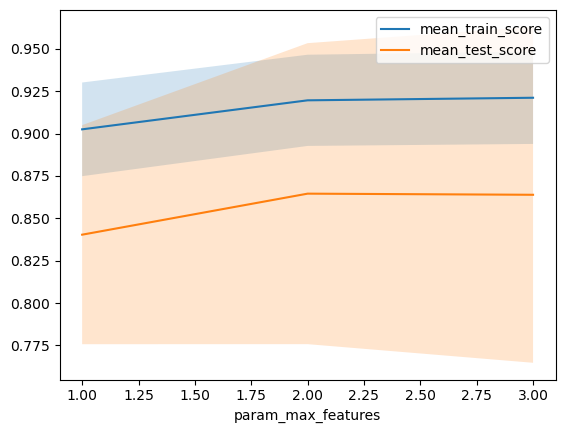

In [39]:
param_grid_tree = {'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_features', 'mean_train_score')
results.plot('param_max_features', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

Train score is 90.4896 %
Test score is 88.5623 %


Text(0.5, 0, 'Relative importance')

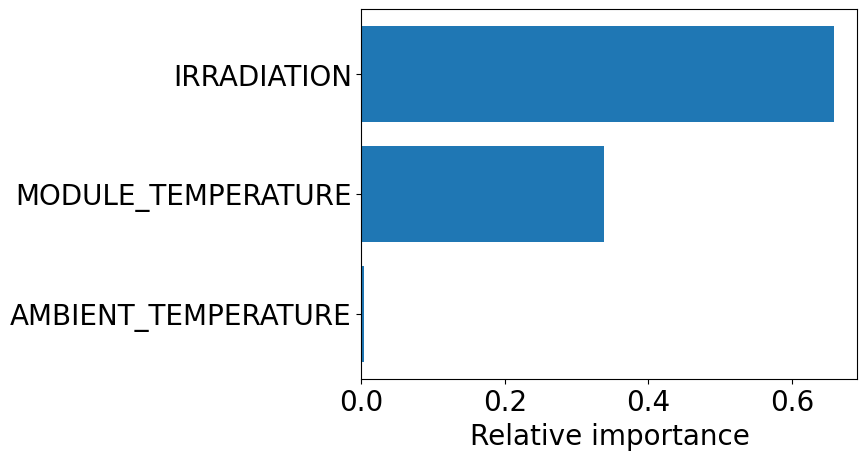

In [40]:
rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, max_features=2, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Relative importance", fontsize=20)


Train score is 90.7544 %
Test score is 89.7910 %


Text(0.5, 0, 'Relative importance')

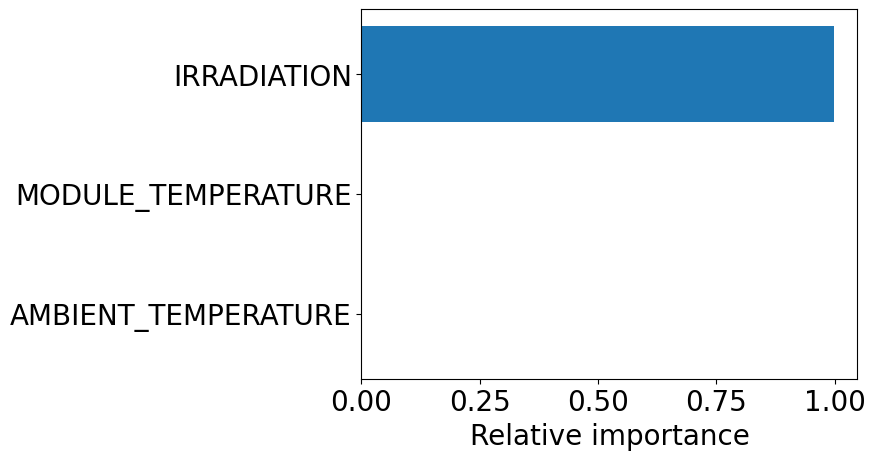

In [41]:
rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, max_features=3, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Relative importance", fontsize=20)


Train score is 90.4896 %
Test score is 88.5623 %


(0.0, 23540.510000000002)

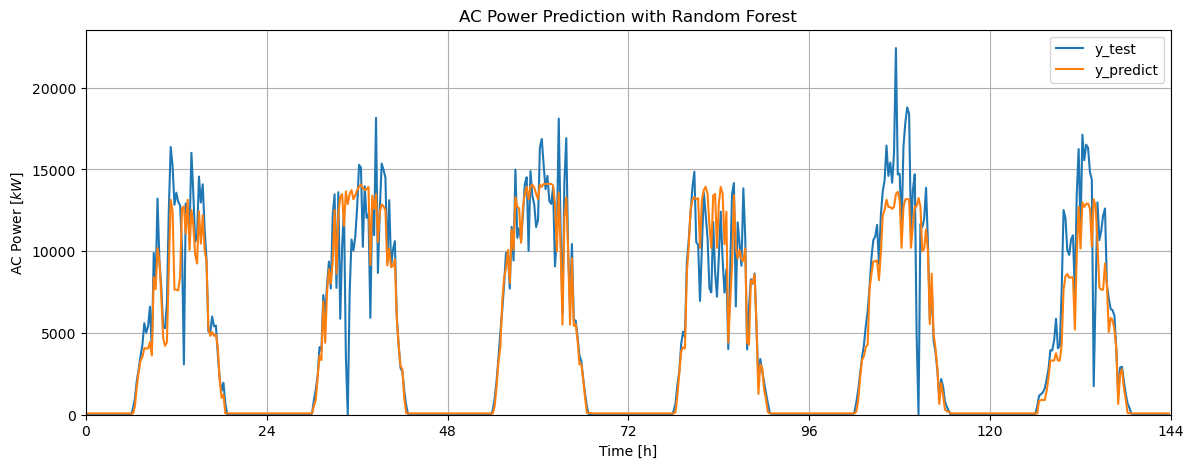

In [43]:

rfr2 = RandomForestRegressor(n_estimators=32, max_depth=3, min_impurity_decrease=0, max_features=2, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")

y_predict = rfr2.predict(X_test)


# display(y_test)
y_test_arr = y_test.to_numpy()
# display(y_test_arr)
# display(y_predict)

NN = y_test_arr.size
# print(NN)
time_step = 0.25 #  in hours
new_time_axis = np.linspace(0, NN*time_step-1*time_step, NN)
# print(new_time_axis.size)



plt.figure(figsize=(14,5))
plt.plot(new_time_axis, y_test_arr, label="y_test")
plt.plot(new_time_axis, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time [h]")
plt.grid()
days = 6
plt.xticks(np.arange(0, 24*(days+1), step=24))  # Set label locations.
plt.xlim(24*(0), 24*(days-0))    
plt.ylim(0,max(y_test_arr)*1.05)



2606   2020-06-12 00:00:00
2607   2020-06-12 00:15:00
2608   2020-06-12 00:30:00
2609   2020-06-12 00:45:00
2610   2020-06-12 01:00:00
               ...        
3177   2020-06-17 22:45:00
3178   2020-06-17 23:00:00
3179   2020-06-17 23:15:00
3180   2020-06-17 23:30:00
3181   2020-06-17 23:45:00
Name: DATE_TIME, Length: 576, dtype: datetime64[ns]

(0.0, 23540.510000000002)

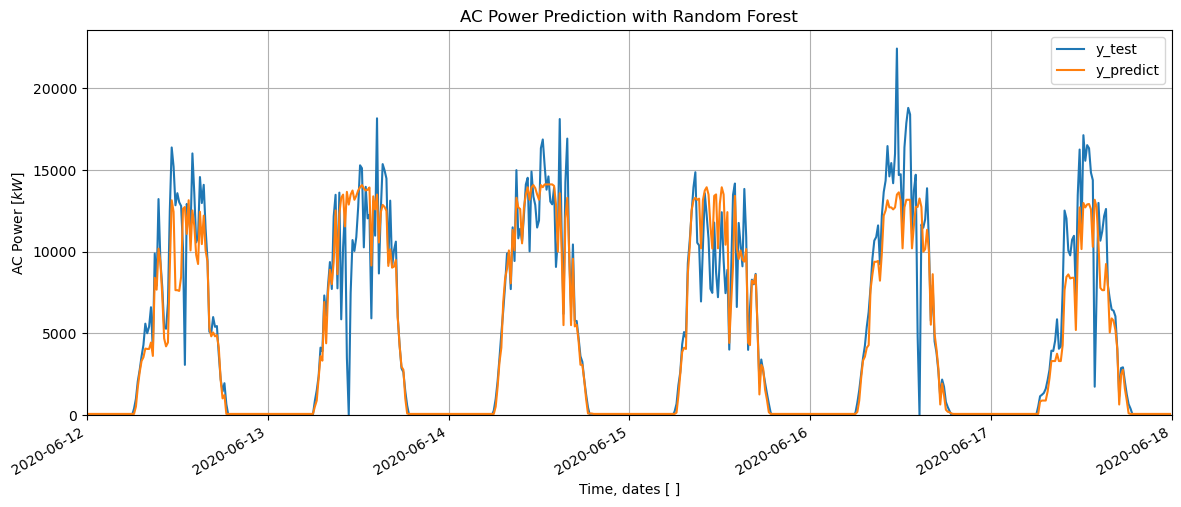

In [299]:
# time_dates = P2.iloc[-NN:,0].to_numpy()

# time_dates = P2[-NN:]["DATE_TIME"]
# time_dates = P2.iloc[-NN:,:]['DATE_TIME']
# # print(time_dates.size)
# display(time_dates)



from helpers import load_data
plant1, plant2, weather1, weather2 = load_data() # I use Mathiases function "load_data()", since this converts "DATE_TIME" to a datetime-format.
time_dates = weather1["DATE_TIME"]
time_dates = time_dates[-NN:]
display(time_dates)


plt.figure(figsize=(14,5))
plt.plot(time_dates, y_test_arr, label="y_test")
plt.plot(time_dates, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time, dates [ ]")
plt.grid()
plt.xticks(rotation=30, ha='right')
plt.xlim(np.datetime64('2020-06-12'),np.datetime64('2020-06-18')) 
plt.ylim(0,max(y_test_arr)*1.05)

In [281]:

# I, Andi, will try to make an exhaustive search for parameters
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}



rfr2 = RandomForestRegressor(random_state=43)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)



{'max_depth': 3, 'max_features': 2, 'min_impurity_decrease': 0, 'n_estimators': 32}
0.9048962584553814
0.8856226038900051
0       0.717237
1       0.717155
2       0.774328
3       0.790134
4       0.775073
          ...   
2299    0.844847
2300    0.845911
2301    0.845700
2302    0.845821
2303    0.846212
Name: mean_test_score, Length: 2304, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_impurity_decrease,param_n_estimators,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.023160,0.009210,0.008010,0.004073,1,1,0,2,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.641901,...,2289,0.874700,0.765679,0.796605,0.785127,0.774074,0.761511,0.771787,0.789926,0.036312
1,0.035416,0.021306,0.006103,0.002246,1,1,0,5,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.680511,...,2297,0.843451,0.758738,0.773249,0.767653,0.759675,0.741202,0.749517,0.770498,0.031377
2,0.033383,0.008007,0.006735,0.002978,1,1,0,8,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.731942,...,2185,0.866915,0.798300,0.813020,0.811870,0.800089,0.786050,0.792987,0.809890,0.024929
3,0.045040,0.017368,0.009301,0.008346,1,1,0,11,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.732738,...,2161,0.888658,0.812011,0.828573,0.830428,0.818958,0.805228,0.810145,0.827714,0.026349
4,0.057976,0.017532,0.006787,0.002170,1,1,0,14,"{'max_depth': 1, 'max_features': 1, 'min_impur...",0.723176,...,2177,0.873398,0.803311,0.816028,0.815847,0.804171,0.790989,0.794151,0.813985,0.025829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,0.245470,0.065595,0.012757,0.004920,11,3,35,35,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.630057,...,1399,0.998206,0.985976,0.981875,0.980405,0.974878,0.972461,0.965939,0.979963,0.009648
2300,0.313975,0.156346,0.025288,0.019549,11,3,35,38,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.631535,...,1281,0.998211,0.986054,0.982259,0.980606,0.975079,0.972530,0.965963,0.980100,0.009642
2301,0.306606,0.138641,0.013436,0.002963,11,3,35,41,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.631858,...,1298,0.998234,0.986324,0.982267,0.980480,0.975030,0.972897,0.966168,0.980200,0.009592
2302,0.279624,0.116182,0.015340,0.005162,11,3,35,44,"{'max_depth': 11, 'max_features': 3, 'min_impu...",0.630849,...,1289,0.998211,0.986568,0.982224,0.980438,0.974843,0.973051,0.966319,0.980236,0.009574


In [307]:
# I, Andi, will try to make an exhaustive search for parameters
# param_grid_tree = {'n_estimators': range(2,20,2), 'max_depth': range(0,12,1), 'min_impurity_decrease': range(0,40,4), 'max_features': range(1,4,1)}
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}


from sklearn.model_selection import RandomizedSearchCV
rfr2 = RandomForestRegressor(random_state=43)
gridrand = RandomizedSearchCV(rfr2, param_distributions=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1) #, random_state=42
gridrand.fit(X_train, y_train)
print(gridrand.best_params_)
print(gridrand.score(X_train, y_train))
print(gridrand.score(X_test, y_test))

resultsrand = pd.DataFrame(gridrand.cv_results_)
print(resultsrand.loc[:,'mean_test_score'])
display(resultsrand)


{'n_estimators': 35, 'min_impurity_decrease': 5, 'max_features': 3, 'max_depth': 3}
0.9075498323891551
0.8976665645279219
0    0.829014
1    0.843748
2    0.834994
3    0.863960
4    0.846999
5    0.856346
6    0.842317
7    0.843209
8    0.849914
9    0.847722
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_impurity_decrease,param_max_features,param_max_depth,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.051860,0.005528,0.006960,0.003839,20,20,2,1,"{'n_estimators': 20, 'min_impurity_decrease': ...",0.713022,...,10,0.928039,0.849570,0.868755,0.875529,0.863620,0.851368,0.852195,0.869868,0.025419
1,0.141766,0.055404,0.019720,0.014751,38,0,1,3,"{'n_estimators': 38, 'min_impurity_decrease': ...",0.697949,...,6,0.970208,0.890136,0.897327,0.900586,0.894608,0.889303,0.888247,0.904345,0.027212
2,0.045205,0.026065,0.006615,0.003215,5,25,2,9,"{'n_estimators': 5, 'min_impurity_decrease': 2...",0.609085,...,9,0.996919,0.973253,0.967757,0.964148,0.959953,0.953443,0.950951,0.966632,0.014308
3,0.178912,0.067225,0.015052,0.008171,35,5,3,3,"{'n_estimators': 35, 'min_impurity_decrease': ...",0.625452,...,1,0.986712,0.899852,0.912433,0.918288,0.912034,0.908909,0.909301,0.921076,0.027280
4,0.164070,0.043688,0.016098,0.008321,35,20,1,9,"{'n_estimators': 35, 'min_impurity_decrease': ...",0.638506,...,5,0.996662,0.978749,0.968287,0.964034,0.952745,0.950165,0.944526,0.965024,0.016872
5,0.015988,0.005497,0.005505,0.004236,2,10,3,3,"{'n_estimators': 2, 'min_impurity_decrease': 1...",0.622062,...,2,0.985179,0.895068,0.906245,0.914410,0.908649,0.905698,0.904851,0.917157,0.028276
6,0.131999,0.036494,0.017725,0.010130,23,30,1,11,"{'n_estimators': 23, 'min_impurity_decrease': ...",0.625747,...,8,0.997081,0.981815,0.977406,0.974467,0.966838,0.964879,0.961239,0.974818,0.011328
7,0.142528,0.033750,0.012997,0.006733,26,30,1,11,"{'n_estimators': 26, 'min_impurity_decrease': ...",0.625272,...,7,0.997176,0.982995,0.978050,0.975196,0.967171,0.964330,0.961327,0.975178,0.011507
8,0.213049,0.048161,0.013902,0.004531,47,15,1,7,"{'n_estimators': 47, 'min_impurity_decrease': ...",0.633344,...,3,0.994736,0.957380,0.950724,0.945007,0.935880,0.930658,0.928811,0.949028,0.021034
9,0.075176,0.021494,0.008638,0.002013,11,20,3,7,"{'n_estimators': 11, 'min_impurity_decrease': ...",0.623131,...,4,0.996934,0.967017,0.960658,0.955356,0.943939,0.942489,0.938015,0.957773,0.018703


{'max_depth': 3, 'n_estimators': 32}
0.9048962584553814
0.8856226038900051
0     0.814221
1     0.816440
2     0.834044
3     0.834410
4     0.833984
        ...   
91    0.846401
92    0.846463
93    0.846164
94    0.846248
95    0.846181
Name: mean_test_score, Length: 96, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.011162,0.001296,0.003581,0.001038,1,2,"{'max_depth': 1, 'n_estimators': 2}",0.705397,0.899010,0.872279,...,96,0.917009,0.842079,0.858071,0.870451,0.858066,0.847047,0.844126,0.862407,0.024104
1,0.019150,0.000876,0.004732,0.000839,1,5,"{'max_depth': 1, 'n_estimators': 5}",0.724347,0.904326,0.875252,...,95,0.921343,0.836816,0.853003,0.864115,0.853907,0.842045,0.841998,0.859033,0.026842
2,0.028607,0.003900,0.008178,0.006350,1,8,"{'max_depth': 1, 'n_estimators': 8}",0.714284,0.917062,0.896782,...,86,0.928704,0.847697,0.868563,0.878804,0.867993,0.857489,0.859143,0.872628,0.024650
3,0.051650,0.016426,0.010321,0.004859,1,11,"{'max_depth': 1, 'n_estimators': 11}",0.708145,0.920375,0.897316,...,84,0.928795,0.850766,0.869253,0.878195,0.868254,0.857913,0.859223,0.873200,0.024167
4,0.063070,0.018645,0.007667,0.002294,1,14,"{'max_depth': 1, 'n_estimators': 14}",0.702520,0.918111,0.899086,...,88,0.928564,0.850680,0.871082,0.878933,0.868748,0.858061,0.859170,0.873605,0.024066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.188510,0.052574,0.011609,0.002592,11,35,"{'max_depth': 11, 'n_estimators': 35}",0.628221,0.868019,0.928102,...,61,0.997953,0.985319,0.982175,0.979222,0.973397,0.971032,0.965580,0.979240,0.009884
92,0.215651,0.083867,0.012890,0.003911,11,38,"{'max_depth': 11, 'n_estimators': 38}",0.629135,0.868752,0.928140,...,60,0.997947,0.985113,0.982409,0.979409,0.973240,0.970821,0.965808,0.979249,0.009869
93,0.224550,0.077475,0.012799,0.004048,11,41,"{'max_depth': 11, 'n_estimators': 41}",0.627520,0.867252,0.928686,...,67,0.997933,0.985300,0.981942,0.979421,0.973349,0.970695,0.965848,0.979213,0.009860
94,0.238337,0.077475,0.013237,0.005166,11,44,"{'max_depth': 11, 'n_estimators': 44}",0.627044,0.867920,0.928905,...,64,0.997928,0.985540,0.982006,0.979253,0.973108,0.970735,0.965639,0.979173,0.009939


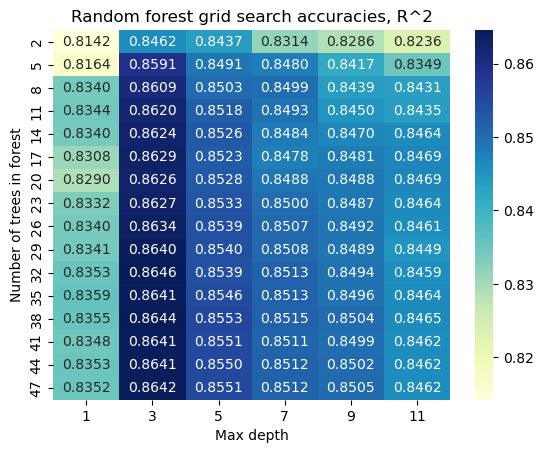

In [314]:

# To make 2D matrics of accuracy at different parameter values.
param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2)}


rfr2 = RandomForestRegressor(random_state=43, min_impurity_decrease=0, max_features=2)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)


# Create a DataFrame from the cv_results_
# results_df = pd.DataFrame(grid.cv_results_)
pivot_table = pd.pivot_table(results, values='mean_test_score', index='param_n_estimators', columns='param_max_depth')

import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".4f")
# Add labels and title
plt.xlabel('Max depth')
plt.ylabel('Number of trees in forest')
plt.title('Random forest grid search accuracies, R^2')
plt.show()



{'max_features': 2, 'min_impurity_decrease': 0}
0.9048962584553814
0.8856226038900051
0     0.840341
1     0.840341
2     0.840341
3     0.840341
4     0.840341
5     0.840341
6     0.840341
7     0.840341
8     0.864562
9     0.864562
10    0.864562
11    0.864562
12    0.864562
13    0.864562
14    0.864562
15    0.864562
16    0.863896
17    0.863896
18    0.863896
19    0.863896
20    0.863896
21    0.863896
22    0.863896
23    0.863896
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.094284,0.037998,0.011157,0.005354,1,0,"{'max_features': 1, 'min_impurity_decrease': 0}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
1,0.105530,0.024331,0.020774,0.028882,1,5,"{'max_features': 1, 'min_impurity_decrease': 5}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
2,0.105003,0.020934,0.010595,0.002583,1,10,"{'max_features': 1, 'min_impurity_decrease': 10}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
3,0.133795,0.034419,0.008953,0.002127,1,15,"{'max_features': 1, 'min_impurity_decrease': 15}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
4,0.092487,0.018391,0.010582,0.002748,1,20,"{'max_features': 1, 'min_impurity_decrease': 20}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
5,0.111437,0.030785,0.011436,0.004215,1,25,"{'max_features': 1, 'min_impurity_decrease': 25}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
6,0.110173,0.029257,0.011911,0.003877,1,30,"{'max_features': 1, 'min_impurity_decrease': 30}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
7,0.114020,0.036823,0.009960,0.001814,1,35,"{'max_features': 1, 'min_impurity_decrease': 35}",0.698095,0.873019,0.911791,...,17,0.969339,0.889673,0.896165,0.898609,0.892341,0.886271,0.885319,0.902531,0.027643
8,0.123608,0.036755,0.013784,0.005781,2,0,"{'max_features': 2, 'min_impurity_decrease': 0}",0.652932,0.921615,0.933226,...,1,0.984667,0.900368,0.911109,0.916484,0.910150,0.907249,0.907596,0.919661,0.026916
9,0.134759,0.027596,0.019449,0.012130,2,5,"{'max_features': 2, 'min_impurity_decrease': 5}",0.652932,0.921615,0.933226,...,1,0.984667,0.900368,0.911109,0.916484,0.910150,0.907249,0.907596,0.919661,0.026916


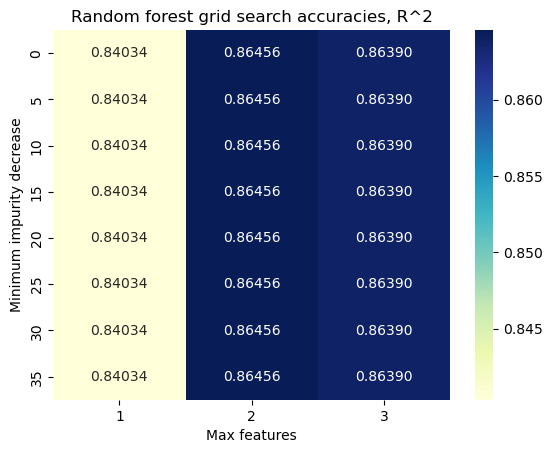

In [313]:

# To make 2D matrics of accuracy at different parameter values.
param_grid_tree = {'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(random_state=43, n_estimators=32, max_depth=3)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)



# Create a DataFrame from the cv_results_
# results_df = pd.DataFrame(grid.cv_results_)
pivot_table = pd.pivot_table(results, values='mean_test_score', index='param_min_impurity_decrease', columns='param_max_features')

import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".5f")
# Add labels and title
plt.xlabel('Max features')
plt.ylabel('Minimum impurity decrease')
plt.title('Random forest grid search accuracies, R^2')
plt.show()





# Code from "andi_AML.ipynb" to make figures for report. Change from plant 1 to plant 2!


Score is 89.3879 %


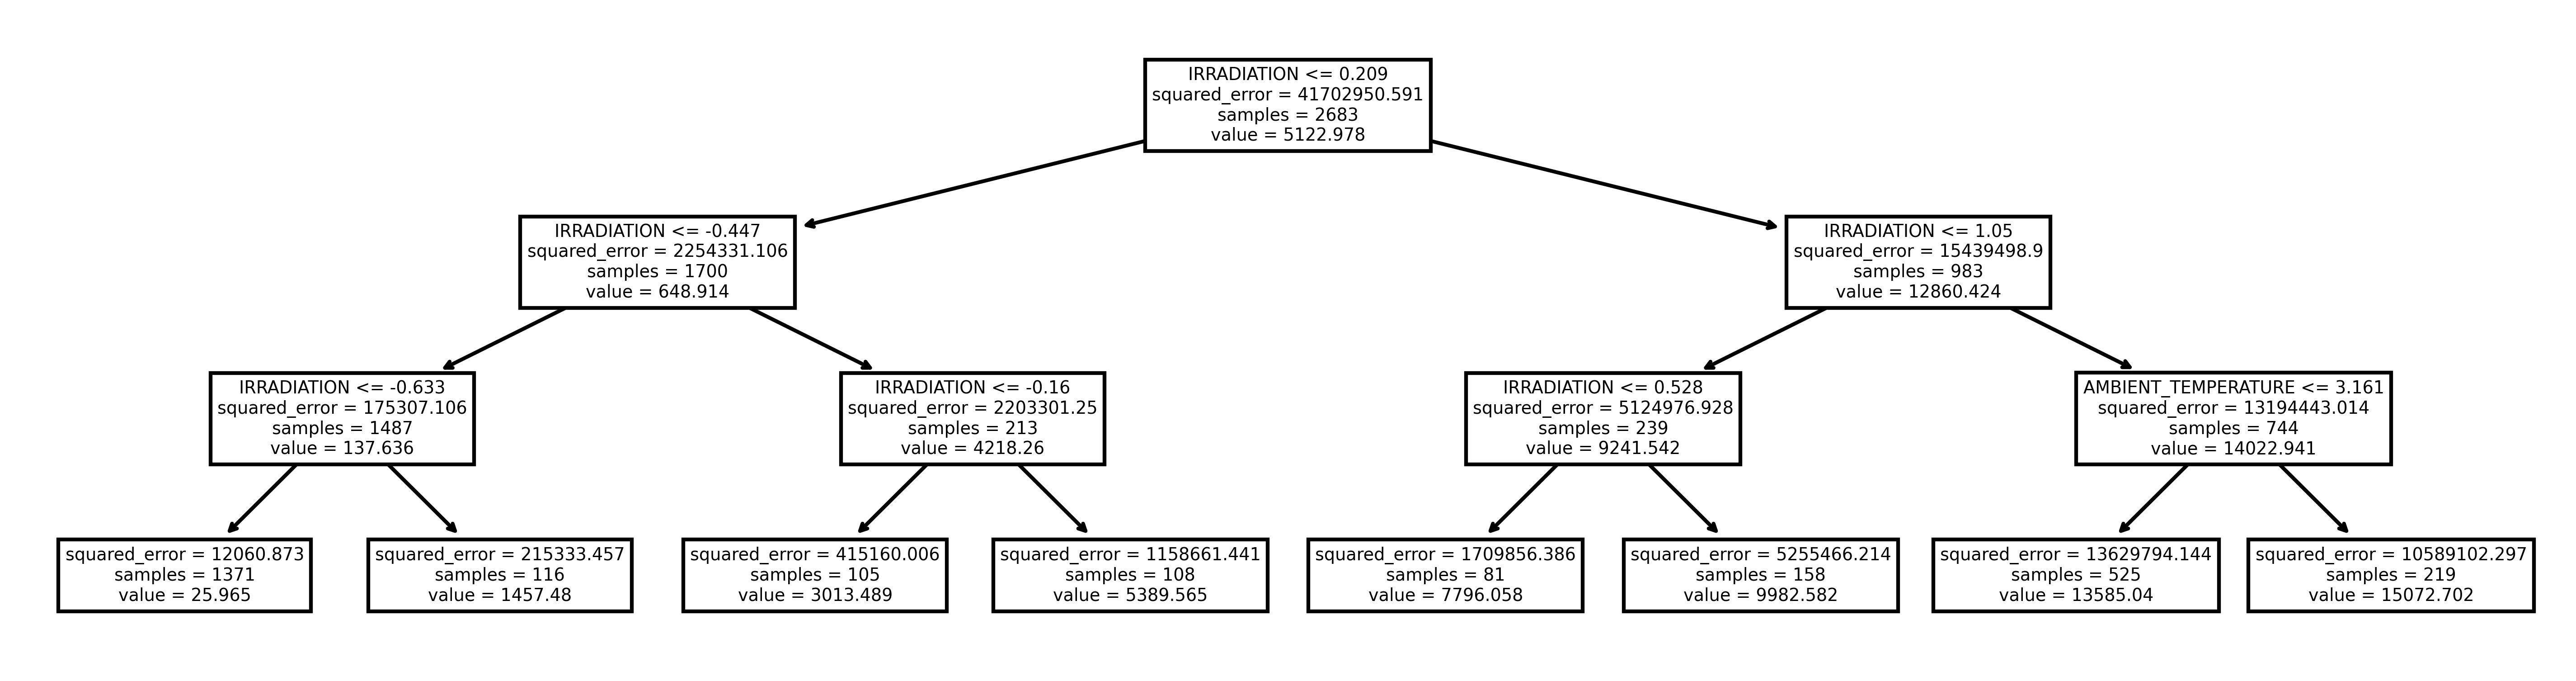

In [17]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import plot_tree

dtr = DecisionTreeRegressor(max_depth=3,  random_state=43)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

plt.figure(figsize=(12, 3), dpi=600)
tree_dot = plot_tree(dtr, feature_names=feature_names)

In [9]:

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib import dates
# import os
# import sys
# module_path = os.path.abspath(".")
# sys.path.insert(0, module_path)
# from helpers import load_data

plant1, plant2, weather1, weather2 = load_data()

plant2.info()
print("\n ########## \n")
weather2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB

 ########## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY      

In [14]:
plant2_tot_data=pd.merge(plant2.drop(columns=["PLANT_ID"]), weather2.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")
# plant1_tot_data['HOUR'] = pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.hour+(pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.minute)/60
# plant1_tot_data['MIDDAYNESS'] = abs(12-abs(plant1_tot_data['HOUR']-12)) 
    # Only maybe use MIDDAYNESS. It has better correlations with power generation than HOUR
    # Or maybe use polynomial features - preprocessing on HOURS???
display(plant2_tot_data)
display(plant2_tot_data.isnull().sum())
display(plant2_tot_data.count())
display(plant2_tot_data.describe())

# plant2_tot_data.head(30)
# display(plant2_tot_data[1000:1030])

efficiency_lis = plant2_tot_data["AC_POWER"]/plant2_tot_data["DC_POWER"]
# display(efficiency_lis[1000:1030])
print(efficiency_lis.mean())


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

DATE_TIME              67698
SOURCE_KEY             67698
DC_POWER               67698
AC_POWER               67698
DAILY_YIELD            67698
TOTAL_YIELD            67698
AMBIENT_TEMPERATURE    67698
MODULE_TEMPERATURE     67698
IRRADIATION            67698
dtype: int64

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204
std,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365
min,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000
25%,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000
50%,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554
75%,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027
max,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766


0.9768063442756146


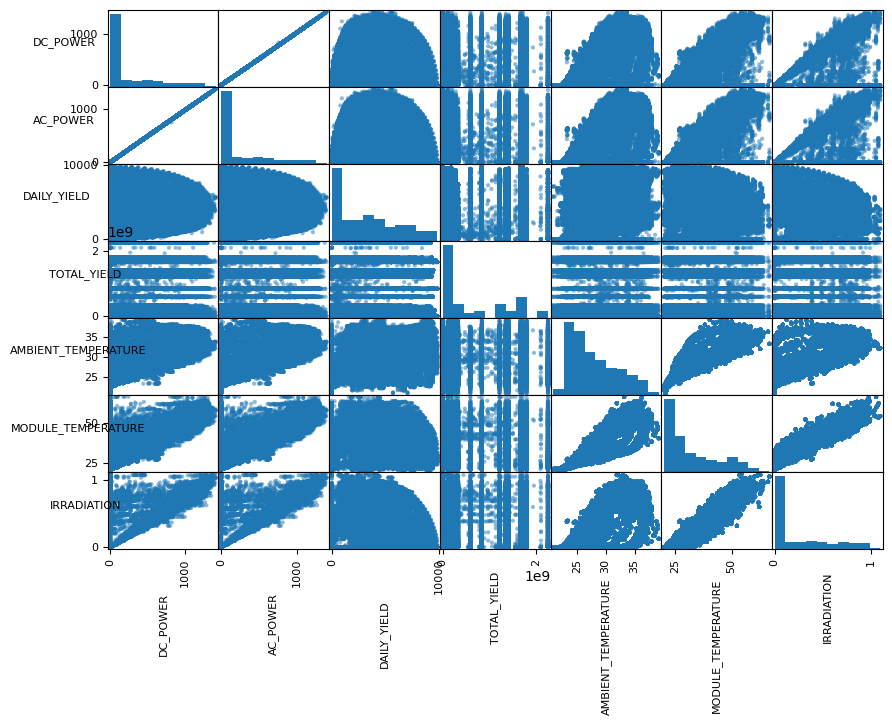

In [5]:

# from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(plant2_tot_data, figsize=(10,7))
[ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 90) for ax in axes.ravel()]
[ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 0) for ax in axes.ravel()]
plt.show()


C:\Users\andir\AppData\Local\Temp\ipykernel_22824\3724938019.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
C:\Users\andir\AppData\Local\Temp\ipykernel_22824\3724938019.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)


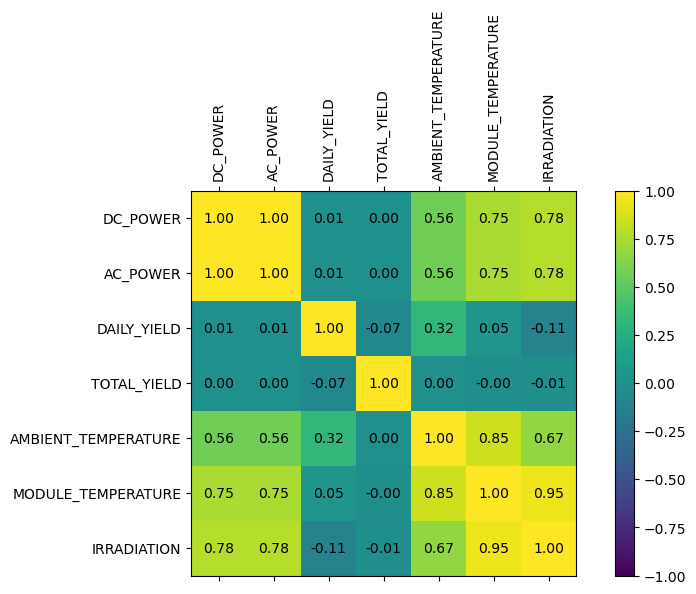

C:\Users\andir\AppData\Local\Temp\ipykernel_22824\3724938019.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.00,1.00,0.01,0.00,0.56,0.75,0.78
AC_POWER,1.00,1.00,0.01,0.00,0.56,0.75,0.78
DAILY_YIELD,0.01,0.01,1.00,-0.07,0.32,0.05,-0.11
TOTAL_YIELD,0.00,0.00,-0.07,1.00,0.00,-0.00,-0.01
AMBIENT_TEMPERATURE,0.56,0.56,0.32,0.00,1.00,0.85,0.67
MODULE_TEMPERATURE,0.75,0.75,0.05,-0.00,0.85,1.00,0.95
IRRADIATION,0.78,0.78,-0.11,-0.01,0.67,0.95,1.00


In [7]:
correlations = plant2_tot_data.corr()
# plot correlation matrix 
    # Made this way, underneath, to get more option, like colorbar. -Andi
fig = plt.figure(figsize=(10, 5)) # Create empty figure.
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
ax.set_yticklabels(plant2_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)
# Note that the column "SOURCE_KEY" is automatically obmitted, since it is not numerical values.
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')#,
            #bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.show()

# Or just use:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


In [27]:
plant1_tot_data=pd.merge(plant1.drop(columns=["PLANT_ID"]), weather1.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")

feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'MIDDAYNESS']
X = plant1_tot_data[feature_names]
y = plant1_tot_data['AC_POWER']


# Just to write out nice table for example data
# display(X)
Xy=pd.concat([X, y], axis=1)
display(Xy[1000:1015])
display(X[1000:1015])
display(y[1000:1015])


from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/34, shuffle=False)


#Making scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fitting scaler to the data
scaler.fit(X_test)

#Transform the data to normal distributions
X_test=pd.DataFrame(scaler.transform(X_test))
X_train=pd.DataFrame(scaler.transform(X_train))

display(X_test)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER
1000,30.287073,49.841364,0.557069,676.071429
1001,30.287073,49.841364,0.557069,712.775000
1002,30.287073,49.841364,0.557069,790.200000
1003,30.287073,49.841364,0.557069,719.062500
1004,30.287073,49.841364,0.557069,690.757143
1005,30.287073,49.841364,0.557069,568.571429
1006,30.287073,49.841364,0.557069,757.571429
1007,30.287073,49.841364,0.557069,752.642857
1008,30.287073,49.841364,0.557069,656.571429
1009,30.287073,49.841364,0.557069,682.442857


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1000,30.287073,49.841364,0.557069
1001,30.287073,49.841364,0.557069
1002,30.287073,49.841364,0.557069
1003,30.287073,49.841364,0.557069
1004,30.287073,49.841364,0.557069
1005,30.287073,49.841364,0.557069
1006,30.287073,49.841364,0.557069
1007,30.287073,49.841364,0.557069
1008,30.287073,49.841364,0.557069
1009,30.287073,49.841364,0.557069


1000    676.071429
1001    712.775000
1002    790.200000
1003    719.062500
1004    690.757143
1005    568.571429
1006    757.571429
1007    752.642857
1008    656.571429
1009    682.442857
1010    593.814286
1011    547.400000
1012    704.114286
1013    646.214286
1014    920.042857
Name: AC_POWER, dtype: float64

,0,1,2
0,-1.59862,-0.969697,-0.777375
1,-1.59862,-0.969697,-0.777375
2,-1.59862,-0.969697,-0.777375
3,-1.59862,-0.969697,-0.777375
4,-1.59862,-0.969697,-0.777375
...,...,...,...
12132,-1.16262,-0.916016,-0.777375
12133,-1.16262,-0.916016,-0.777375
12134,-1.16262,-0.916016,-0.777375
12135,-1.16262,-0.916016,-0.777375


In [28]:



tscv = TimeSeriesSplit(n_splits=7)




param_grid_tree = {'n_estimators': range(2,50,3), 'max_depth': range(1,12,2), 'min_impurity_decrease': range(0,40,5), 'max_features': range(1,4,1)}


from sklearn.model_selection import RandomizedSearchCV
rfr2 = RandomForestRegressor(random_state=43)
gridrand = RandomizedSearchCV(rfr2, param_distributions=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1) #, random_state=42
gridrand.fit(X_train, y_train)
print(gridrand.best_params_)
print(gridrand.score(X_train, y_train))
print(gridrand.score(X_test, y_test))

resultsrand = pd.DataFrame(gridrand.cv_results_)
print(resultsrand.loc[:,'mean_test_score'])
display(resultsrand)


{'n_estimators': 8, 'min_impurity_decrease': 10, 'max_features': 3, 'max_depth': 5}
0.983155371138076
0.9772175079699141
0    0.966834
1    0.970240
2    0.974269
3    0.783736
4    0.784921
5    0.837127
6    0.971392
7    0.980675
8    0.980552
9    0.973926
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_impurity_decrease,param_max_features,param_max_depth,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.512350,0.247302,0.018576,0.002978,38,35,1,5,"{'n_estimators': 38, 'min_impurity_decrease': ...",0.962978,...,7,0.982108,0.982517,0.983989,0.982422,0.980613,0.980963,0.974792,0.981058,0.002755
1,0.092588,0.046602,0.006018,0.002471,5,20,1,11,"{'n_estimators': 5, 'min_impurity_decrease': 2...",0.978158,...,6,0.987580,0.988321,0.987800,0.986940,0.985023,0.984187,0.979104,0.985565,0.002988
2,0.574104,0.289299,0.013955,0.002036,29,25,3,3,"{'n_estimators': 29, 'min_impurity_decrease': ...",0.974079,...,3,0.979368,0.980983,0.984536,0.982952,0.981515,0.980757,0.975585,0.980814,0.002629
3,0.183326,0.064150,0.012621,0.002660,29,35,1,1,"{'n_estimators': 29, 'min_impurity_decrease': ...",0.758453,...,10,0.813215,0.810617,0.807700,0.802562,0.797542,0.804602,0.799360,0.805085,0.005343
4,0.260665,0.070685,0.015741,0.003045,38,10,1,1,"{'n_estimators': 38, 'min_impurity_decrease': ...",0.757342,...,9,0.813080,0.811810,0.808260,0.804055,0.798904,0.805969,0.800429,0.806072,0.004987
5,0.062443,0.019489,0.008754,0.005203,5,5,2,1,"{'n_estimators': 5, 'min_impurity_decrease': 5...",0.831640,...,8,0.853596,0.851225,0.859331,0.860683,0.854907,0.854488,0.845546,0.854254,0.004675
6,0.249883,0.107515,0.009134,0.002987,14,25,2,3,"{'n_estimators': 14, 'min_impurity_decrease': ...",0.970589,...,5,0.978714,0.980818,0.983119,0.982595,0.980753,0.980455,0.975015,0.980210,0.002510
7,0.208730,0.104980,0.006811,0.001523,8,10,3,5,"{'n_estimators': 8, 'min_impurity_decrease': 1...",0.987164,...,1,0.987966,0.988967,0.989573,0.988776,0.987628,0.987894,0.982451,0.987608,0.002200
8,0.543278,0.195782,0.010040,0.002712,26,15,3,5,"{'n_estimators': 26, 'min_impurity_decrease': ...",0.986790,...,2,0.987850,0.988787,0.989589,0.988707,0.987435,0.987663,0.982362,0.987485,0.002205
9,0.247427,0.083703,0.010557,0.002014,17,0,1,7,"{'n_estimators': 17, 'min_impurity_decrease': ...",0.973777,...,4,0.988715,0.989943,0.989748,0.988762,0.987443,0.987797,0.980985,0.987628,0.002841


Train score is 98.3155 %
Test score is 97.7218 %


Text(0.5, 0, 'Relative importance')

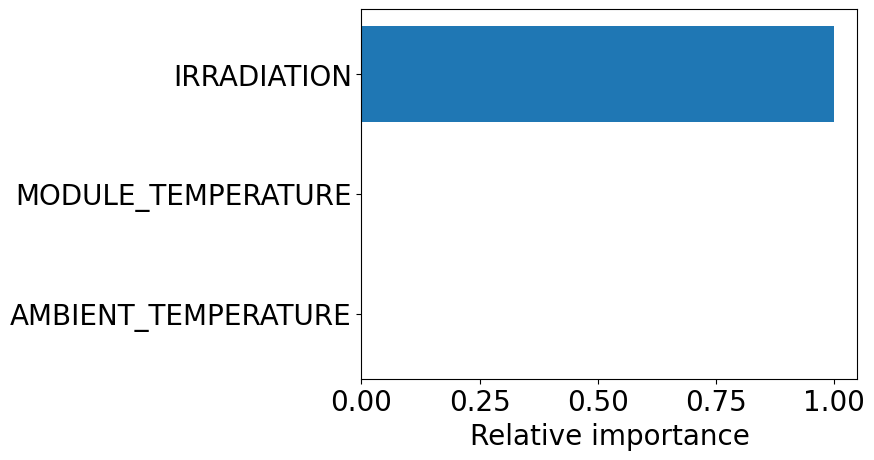

In [29]:
rfr2 = RandomForestRegressor(n_estimators=8, min_impurity_decrease=10, max_features=3, max_depth=5, random_state=43)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Relative importance", fontsize=20)